### Install dependencies:

In [1]:
#!git clone https://github.com/ultralytics/yolov5

### Import dependencies:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2

import os
os.environ['PYTHONHTTPSVERIFY'] = '0' # Disable SSL to make it work on Mac

### Initial model from Torch Hub:

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') # Load the model, 5s indicates v5, small model

Using cache found in /Users/rajin/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-3-6 Python-3.13.1 torch-2.6.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


### Display info about the model:

In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### Load images and make baseline detections:

In [5]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [6]:
results = model(img)
results.print()

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 4520.6ms pre-process, 74.9ms inference, 7.1ms NMS per image at shape (1, 3, 384, 640)


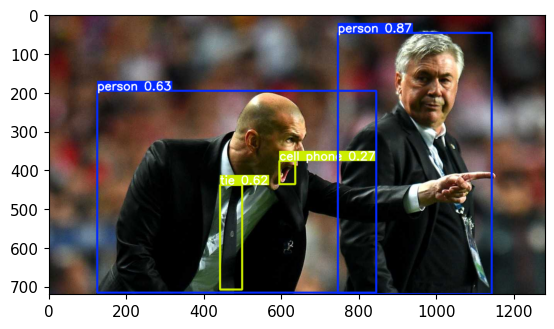

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

In [8]:
img2 = 'https://media.istockphoto.com/id/159406920/photo/aerial-view-of-cars-in-traffic.jpg?s=612x612&w=0&k=20&c=2BeXnk1EppE_mfWgYFqoXidmge0uAhSk9gl8bbtHyF8%3D'
results2 = model(img2)
results2.print()

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 408x612 27 cars, 1 traffic light
Speed: 106.9ms pre-process, 78.0ms inference, 0.8ms NMS per image at shape (1, 3, 448, 640)


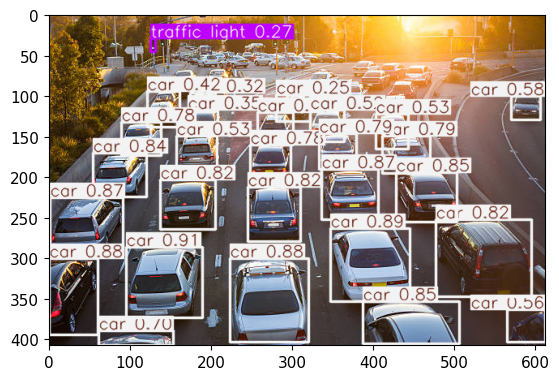

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))

### Real time detection:

In [ ]:
'''cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detection
    results = model(frame)
    
    cv2.imshow('DOZR', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)'''

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py

-1

### Detection with video files:

In [11]:
'''cap = cv2.VideoCapture('./traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detection
    results = model(frame)
    
    cv2.imshow('DOZR', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)'''

"cap = cv2.VideoCapture('./traffic.mp4')\nwhile cap.isOpened():\n    ret, frame = cap.read()\n    \n    # Make detection\n    results = model(frame)\n    \n    cv2.imshow('DOZR', np.squeeze(results.render()))\n    \n    if cv2.waitKey(10) & 0xFF == ord('q'):\n        break\ncap.release()\ncv2.destroyAllWindows()\ncv2.waitKey(1)"

### Setting up image capture for training:

In [2]:
import uuid # unique identifier
import os
import time

In [3]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [16]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Cam feed
        ret, frame = cap.read()

        # Image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Write image to file
        cv2.imwrite(imgname, frame)
        
        # Render to screen
        cv2.imshow('Image Collection', frame)
        time.sleep(2) # 2s delay between captures
     
        # Exiting and closing the window   
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Install dependencies and software for Image Labelling:

In [ ]:
# !git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2093 (from 2)
Receiving objects: 100% (2097/2097), 237.14 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


### Then, Images were labelled using the LabelImg software.

### Set up and train our custom model (fine-tuning):

In [21]:
!cd yolov5 && python3 train.py --img 320 --batch 10 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=10, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.13.1 torch-2.6.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

### Load our fine tuned model:

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/rajin/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-3-8 Python-3.13.1 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


### Detection using our image:

In [27]:
testimg = os.path.join('data', 'images', 'awake.aca718b8-fb2f-11ef-b7a6-0222d1eed505.jpg')

In [28]:
results = model(testimg)

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


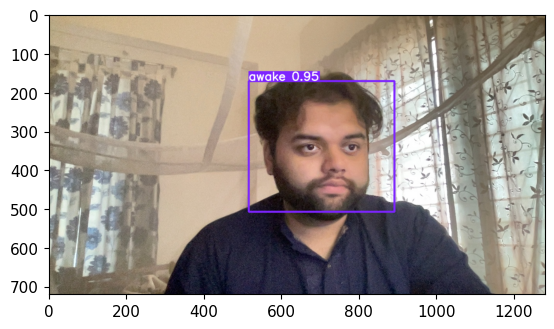

In [29]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

### Real Time Drowsiness Detection:

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detection
    results = model(frame)
    
    cv2.imshow('DOZR', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/rajin/.cache/torch/hub/ultralytics_yolov5_master/models/common.py

-1

### And that concludes this notebook for the development and training of the initial **DOZR** model!

### Notes for further development:
- Collect and label more images
- Train the model again and improve

### The software/application that will use this model will be developed ASAP!